# DS 3000 - Assignment 5

**Student Name**: [Julia Ouritskaya]

**Date**: [10/6/2023]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## NTSB Data Science Accident & Incident Investigation (50 pts)

The National Transportation Safety Board (NTSB) publishes a dataset on select aviation accidents and incidents within the United States, its territories, and in international waters. The NTSB database is updated daily and the status of each event, i.e. the accident or incident, undergoes different stages from filing a preliminary report, to obtaining factual information, leading up to the end of the investigation and the probable cause. The dataset can be obtained from the NTSB website along with the data dictionary.

You are given the task of performing a preliminary investigation of the domestic (United States) and international flights using the dataset. Note: you are working with a real dataset, that was generated by the NTSB. Be mindful of the nature of the dataset, when determining data preparation steps. I also encourage you to open the file, using a text editor, and manually inspect it. This will help you to import it correctly into the dataframe.

Dataset: source files | data dictionary

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1: (5 pts) 

Import the data into a dataframe, and extract the following columns: Broad Phase of Flight, Total Uninjured, Total Minor Injuries, Total Serious Injuries, Total Fatal Injuries, Air Carrier, Make, Model, Aircraft Category, Aircraft Damage, Injury Severity, Country, Event Date, Investigation Type, Event Id.
- Remove leading and trailing white-spaces from the selected columns, convert their data to suitable data types and perform at least one additional data preparation step.

In [2]:
# Import the data into a dataframe
aviation_df = pd.read_csv('aviation_data.csv', delimiter='|')

# Remove leading and trailing white-spaces
aviation_df.columns = aviation_df.columns.str.strip()

# Extract necessary columns
columns = ['Broad Phase of Flight', 'Total Uninjured', 'Total Minor Injuries', 'Total Serious Injuries', 'Total Fatal Injuries', 'Air Carrier', 'Make', 'Model', 'Aircraft Category', 'Aircraft Damage', 'Injury Severity', 'Country', 'Event Date', 'Investigation Type', 'Event Id']
aviation_df = aviation_df[columns]

In [3]:
# Inspect the data to indicate if the variables have suitable types
aviation_df.dtypes

Broad Phase of Flight     object
Total Uninjured           object
Total Minor Injuries      object
Total Serious Injuries    object
Total Fatal Injuries      object
Air Carrier               object
Make                      object
Model                     object
Aircraft Category         object
Aircraft Damage           object
Injury Severity           object
Country                   object
Event Date                object
Investigation Type        object
Event Id                  object
dtype: object

In [4]:
# Convert data to suitable data types
aviation_df['Event Date'] = pd.to_datetime(aviation_df['Event Date'])

injury_columns = ['Total Uninjured', 'Total Minor Injuries', 'Total Serious Injuries', 'Total Fatal Injuries']

for col in injury_columns:
    aviation_df[col] = pd.to_numeric(aviation_df[col], errors='coerce')

In [5]:
# Checking for missing data
aviation_df.isnull().sum()

Broad Phase of Flight         0
Total Uninjured           15170
Total Minor Injuries      29840
Total Serious Injuries    31077
Total Fatal Injuries      28330
Air Carrier                   0
Make                          0
Model                         0
Aircraft Category             0
Aircraft Damage               0
Injury Severity               0
Country                       0
Event Date                    0
Investigation Type            0
Event Id                      0
dtype: int64

In [6]:
# Additional data preparation -- handling missing values

# Calculate the mean for each column
mean_uninjured = aviation_df['Total Uninjured'].mean()
mean_minor_injuries = aviation_df['Total Minor Injuries'].mean()
mean_serious_injuries = aviation_df['Total Serious Injuries'].mean()
mean_fatal_injuries = aviation_df['Total Fatal Injuries'].mean()

# Fill missing values with the means
aviation_df['Total Uninjured'].fillna(mean_uninjured, inplace=True)
aviation_df['Total Minor Injuries'].fillna(mean_minor_injuries, inplace=True)
aviation_df['Total Serious Injuries'].fillna(mean_serious_injuries, inplace=True)
aviation_df['Total Fatal Injuries'].fillna(mean_fatal_injuries, inplace=True)

In [7]:
# Checking for missing data
aviation_df.isnull().sum()

Broad Phase of Flight     0
Total Uninjured           0
Total Minor Injuries      0
Total Serious Injuries    0
Total Fatal Injuries      0
Air Carrier               0
Make                      0
Model                     0
Aircraft Category         0
Aircraft Damage           0
Injury Severity           0
Country                   0
Event Date                0
Investigation Type        0
Event Id                  0
dtype: int64

In [8]:
# Additional data preparation -- converting string columns to lowercase and removing leading and trailing white-spaces
string_columns = ['Broad Phase of Flight', 'Air Carrier', 'Make', 'Model', 'Aircraft Category', 'Aircraft Damage', 'Injury Severity', 'Country', 'Investigation Type', 'Event Id']

for col in string_columns:
    aviation_df[col] = aviation_df[col].str.strip().str.lower()

In [9]:
aviation_df.head()

,Broad Phase of Flight,Total Uninjured,Total Minor Injuries,Total Serious Injuries,Total Fatal Injuries,Air Carrier,Make,Model,Aircraft Category,Aircraft Damage,Injury Severity,Country,Event Date,Investigation Type,Event Id
0,cruise,1.000000,0.527972,0.335087,0.85823,,zenith,ch 750,airplane,substantial,non-fatal,united states,2020-09-20,accident,20200922x85131
1,,1.000000,0.527972,0.335087,0.85823,,air tractor,at 402,airplane,destroyed,non-fatal,united states,2020-09-19,accident,20200920x32151
2,maneuvering,6.180493,0.527972,0.335087,2.00000,,raven aircraft corppration,raven,airplane,destroyed,fatal(2),germany,2020-09-19,accident,20200922x81021
3,,1.000000,0.527972,0.335087,0.85823,,piper,pa28,airplane,substantial,non-fatal,united states,2020-09-18,accident,20200921x81023
4,,6.180493,0.527972,0.335087,0.85823,,cessna,r182,airplane,substantial,unavailable,united states,2020-09-17,accident,20200921x15712


## Question 2: (10 pts) 

Calculate the number of events that transpired each year and display the results using a line chart. Which year has the highest number of events?

In [10]:
# Extract the year from the 'Event Date' column
aviation_df['Year'] = aviation_df['Event Date'].dt.year

# Group by the year and calculate the number of events that transpired each year
no_events_each_year = aviation_df.groupby('Year').size()

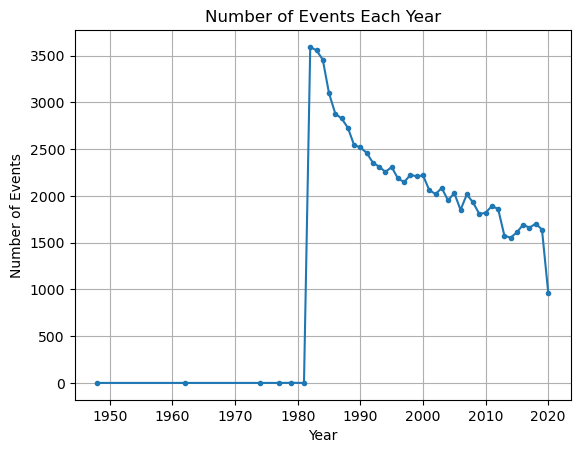

In [11]:
# Display the results using a line chart
no_events_each_year.plot(kind='line', marker='.')
plt.title('Number of Events Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()

In [12]:
# Which year has the highest number of events?
sorted_events = no_events_each_year.sort_values(ascending=False)
highest_year = sorted_events.index[0]
highest_events = sorted_events.iloc[0]

print(f"The year with the highest number of events is {highest_year} with {highest_events} events.") 

The year with the highest number of events is 1982 with 3593 events.


This line chart shows the number of events that transpired each year. It is evident from the chart that the year with highest number of events is 1982 with 3,593 events. 

## Question 3: (10 pts) 

Create a suitable visualization that shows the proportion of Accidents and Incidents in the dataset. Hint: use the Investigation Type. Explain the results.

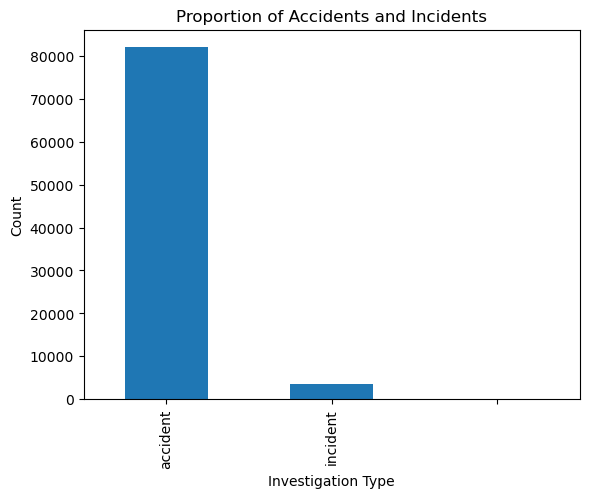

In [13]:
# Count Accidents and Incidents in the 'Investigation Type'
investigation_type_counts = aviation_df['Investigation Type'].value_counts()

# Create a suitable visualization (bar chart) that shows the proportion of Accidents and Incidents in this dataset
investigation_type_counts.plot(kind='bar')
plt.title('Proportion of Accidents and Incidents')
plt.xlabel('Investigation Type')
plt.ylabel('Count')
plt.show()

This bar chart shows the proportion of Accidents and Indcidents in the NTSB dataste. It is evident that a large portion of the data deals with accidents rather than incidents, with over 80,000 observations of an accident and less than 10,000 observations of an incident. This demonstrates that the NTSB deals with more severe aviation investigation types. 

## Question 4: (10 pts) 

Create a suitable visualization that calculates the number of events grouped by the aircraft make (e.g. Cessna, Boeing, Piper, etc).** Visualize which aircraft has the most events; only show the top ten results. Comment on the results.

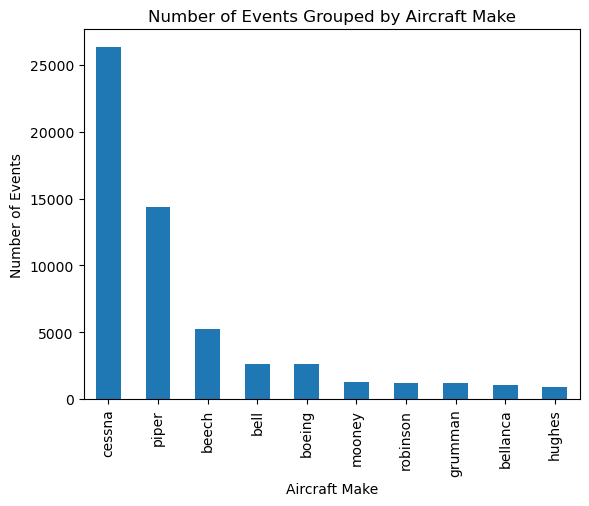

In [14]:
# Group by 'Make' and caculate the number of events 
no_events_by_aircraft_make = aviation_df['Make'].value_counts()

# Select the top ten results
top_10_aircraft_make = no_events_by_aircraft_make.head(10)

# Visualize the number of events grouped by the aircraft make (e.g. Cessna, Boeing, Piper, etc)
top_10_aircraft_make.plot(kind='bar')
plt.title('Number of Events Grouped by Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Events')
plt.show()

This bar charts shows the number of events grouped by aircraft make for the top ten results. It is evident that CESSNA is the most popular aircraft make having over 25,000 events. This could inidicate that these aircrafts are less safe than others, as they have higher observations of accidents or incidents. Most of the other aircraft makes seem to have way less events, with under 15,000 observations. This could be an indicator that they are more safe. 

## Question 5: (15 pts) 

Let's dig deeper: Filter the data and extract all events for the Boeing 737 aircraft (i.e. the make is Boeing and the model is 737)**. Create suitable visualizations to answer the following using the extracted data:

- What year had the most accidents,
- What Phase of Flight did most accidents transpire, and
- Using the Injury Severity variable, determine if most events were fatal or non-fatal? Note: you may need to do additional preparation for the Injury Severity variable.

In [15]:
# Filter the data and extract all events for the Boeing 737 aircraft
boeing_737_df = aviation_df[(aviation_df['Make'] == 'boeing') & (aviation_df['Model'] == '737') & (aviation_df['Investigation Type'] == 'accident')].copy()

boeing_737_df

,Broad Phase of Flight,Total Uninjured,Total Minor Injuries,Total Serious Injuries,Total Fatal Injuries,Air Carrier,Make,Model,Aircraft Category,Aircraft Damage,Injury Severity,Country,Event Date,Investigation Type,Event Id,Year
60,takeoff,76.000000,0.527972,0.335087,0.85823,,boeing,737,airplane,substantial,non-fatal,japan,2020-08-29,accident,20200831x31013,2020
163,landing,6.180493,0.527972,0.335087,0.85823,,boeing,737,airplane,destroyed,unavailable,india,2020-08-07,accident,20200807x61858,2020
278,climb,116.000000,0.527972,1.000000,0.85823,,boeing,737,airplane,,non-fatal,south africa,2020-07-14,accident,20200728x34409,2020
548,takeoff,95.000000,0.527972,0.335087,0.85823,swift air llc,boeing,737,airplane,substantial,non-fatal,united states,2020-05-19,accident,20200521x63755,2020
655,cruise,25.000000,0.527972,1.000000,0.85823,,boeing,737,airplane,,non-fatal,japan,2020-04-12,accident,20200528x83033,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33510,,6.180493,0.527972,1.000000,0.85823,,boeing,737,,substantial,non-fatal,uruguay,2002-02-11,accident,20020308x00318,2002
39422,descent,76.000000,0.000000,1.000000,0.00000,,boeing,737,,,non-fatal,united states,1999-05-25,accident,20001212x18874,1999
64975,descent,106.000000,0.000000,1.000000,0.00000,united airlines (dba: united airlines),boeing,737,,,non-fatal,united states,1988-06-26,accident,20001213x25883,1988
66909,maneuvering,74.000000,6.000000,1.000000,0.00000,usair,boeing,737,,,non-fatal,united states,1987-09-18,accident,20001213x32184,1987


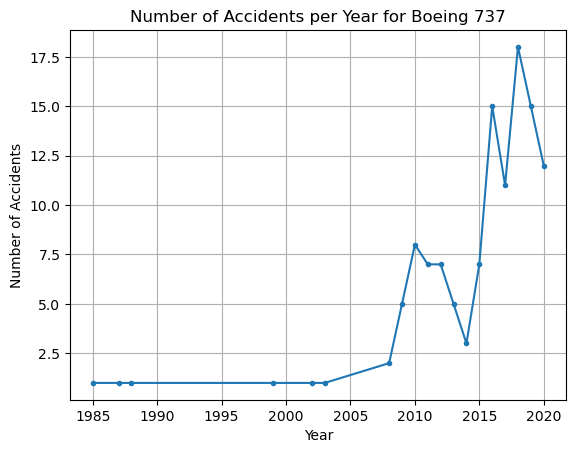

The year with the most accidents for Beoing 737 is 2018.


In [16]:
# What year had the most accidents?
# Extract the year from the 'Event Date' column
boeing_737_df['Year'] = boeing_737_df['Event Date'].dt.year
accidents_per_year = boeing_737_df['Year'].value_counts().sort_index()

# Visualization
accidents_per_year.plot(kind='line', marker='.')
plt.title('Number of Accidents per Year for Boeing 737')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

most_accidents_year = accidents_per_year.idxmax()
print(f"The year with the most accidents for Beoing 737 is {most_accidents_year}.")

This line chart shows the number of accidents per year for Boeing 737. It is evident that the number of accidents have increased over time from 1985 to 2020, with the highest number of accidents for Boeing 737 occuring in 2018.

In [17]:
print(boeing_737_df['Broad Phase of Flight'].unique())

# Impute missing values for 'Broad Phase of Flight'
boeing_737_df['Broad Phase of Flight'] = boeing_737_df['Broad Phase of Flight'].replace('', 'not specified')

['takeoff' 'landing' 'climb' 'cruise' 'standing' '' 'descent' 'approach'
 'go-around' 'taxi' 'maneuvering']


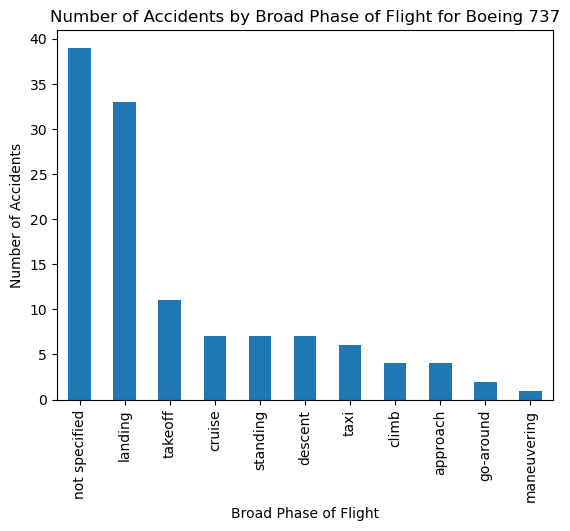

The Broad Phase of Flight with the most accidents for Boeing 737 is not specified.
The Broad Phase of Flight with the second most accidents for Boeing 737 is landing.


In [18]:
# What Phase of Flight did the most accidents transpire?
phase_of_flight_accidents = boeing_737_df['Broad Phase of Flight'].value_counts()

# Visualization
phase_of_flight_accidents.plot(kind='bar')
plt.title('Number of Accidents by Broad Phase of Flight for Boeing 737')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Accidents')
plt.show()

most_accidents_phase = phase_of_flight_accidents.idxmax()
second_most_common_accidents_phase = phase_of_flight_accidents.drop(most_accidents_phase).idxmax()

print(f"The Broad Phase of Flight with the most accidents for Boeing 737 is {most_accidents_phase}.")
print(f"The Broad Phase of Flight with the second most accidents for Boeing 737 is {second_most_common_accidents_phase}.")

This bar chart shows the number of accidents by Broad Phase of Flight for Boeing 737. It is evident that the highest number of accidents occur for an unspecified broad phase of flight. The second highest number of accidents occur during landing.

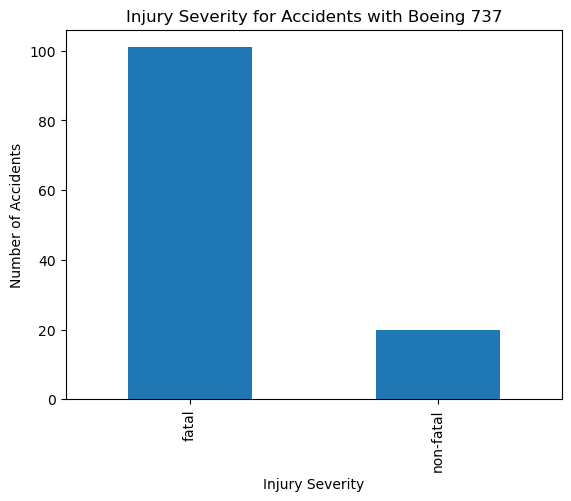

The most common injury severity for accidents with Boeing 737 is fatal.


In [19]:
# Using the Injury Severity variable, determine if most events were fatal or non-fatal? 
severity_counts = boeing_737_df['Injury Severity'].apply(lambda x: 'fatal' if 'fatal' in x.lower() else 'non-fatal').value_counts()

# Visualization
severity_counts.plot(kind='bar')
plt.title('Injury Severity for Accidents with Boeing 737')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Accidents')
plt.show()

most_common_severity = severity_counts.idxmax()
print(f"The most common injury severity for accidents with Boeing 737 is {most_common_severity}.")

This bar chart shows the injury severity for accidents with Boeing 737. It is evident that most accidents are fatal, with over 100 observations. 

## Question 6: (5 pts) [optional/bonus]

Create any (1) visualization of your choice to demonstrate something interesting about the data. Ensure that you explain what you will demonstrate and the results.

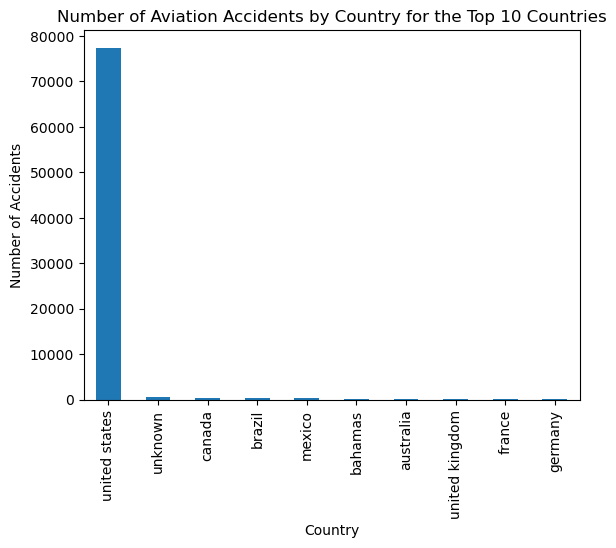

The country with the most aviation accidents is united states.


In [20]:
# Create a visualization that displays the number of aviation accidents by country for the top 10 countries.

# Replace missing values with 'Unknown'
aviation_df['Country'].replace('', 'unknown', inplace=True)

# Filter the data to only include accidents from 'Investigation Type'
accident_df = aviation_df[aviation_df['Investigation Type'] == 'accident']

# Calculate the number of accidents by country
country_counts = accident_df['Country'].value_counts()

# Select the top 10 countries
top_10_countries = country_counts.head(10)

# Visualization
top_10_countries.plot(kind='bar')
plt.title('Number of Aviation Accidents by Country for the Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.show()

top_country = top_10_countries.idxmax()
print(f"The country with the most aviation accidents is {top_country}.")

This bar chart shows the number of aviation accidents by country for the top 10 countries. It is evident that the United States has the highest number of aviation accidents.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
